# The 2D projection of an SVC with a RBF with higher dimensional noisy components

In [1]:
import numpy as np
import matplotlib as mpl; import matplotlib.pyplot as plt
%matplotlib inline
import os; import pickle
#import sympy
#import scipy
#from scipy import special

In [2]:
def train_svm(train_X, train_Y, test_X, test_Y, kernel = 'rbf', C=1.0, verbose = False, pickle = False, suffix = ""):
	scaler = sk.preprocessing.StandardScaler().fit(train_X)
	clf = sk.svm.SVC(kernel = kernel, C=C)# svm with rbf kernel (default)
	clf.fit(scaler.transform(train_X), train_Y)
	if verbose:
		print "training score: ", clf.score(scaler.transform(train_X), train_Y)
		print "testing score: ", clf.score(scaler.transform(test_X), test_Y)
	if pickle:
		store_obj(scaler, "classifiers/scaler_svm_" + kernel + suffix)
		store_obj(clf, "classifiers/clf_svm_" + kernel + suffix)
	return scaler, clf

In [10]:
import sklearn as sk
from sklearn.cross_validation import train_test_split
from sklearn import svm, preprocessing, cross_validation, cluster, metrics

## Try to separate two well separated groups

In [45]:
x_train = np.zeros((2000,2))
x_train[0:1000,:]=2+np.random.random((1000,2))
x_train[1000:,] = (-2)+np.random.random((1000,2))
y_train = np.zeros((2000))
y_train[0:1000] = np.ones((1000))
x_test = np.zeros((1000,2))
x_test[0:500,:]=2+np.random.random((500,2))
x_test[500:,] = (-2)+np.random.random((500,2))
y_test = np.zeros((1000))
y_test[0:500] = np.ones((500))
scaler = sk.preprocessing.StandardScaler().fit(x_train)
clf = sk.svm.SVC(kernel = 'rbf', C=1.0) # svm with rbf kernel (default)
clf.fit(scaler.transform(x_train), y_train);
xx, yy = np.meshgrid(np.linspace(-5, 5, 100),np.linspace(-5, 5,100))
Z = clf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

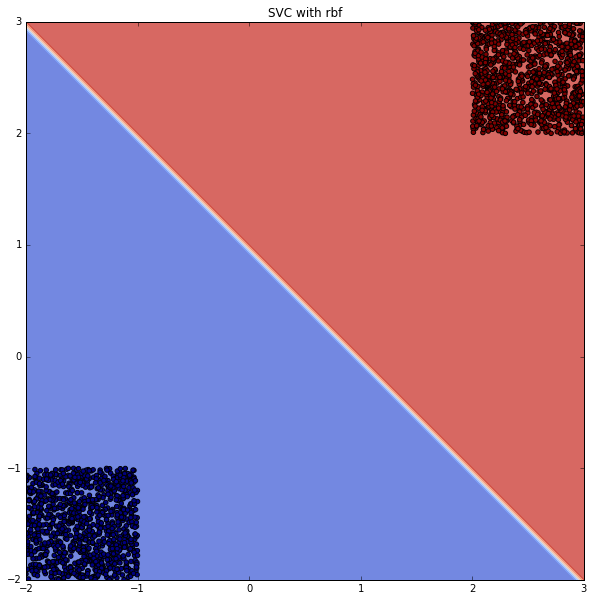

In [47]:
plt.figure(figsize=(10,10))
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.xlim(-2,3)
plt.ylim(-2,3)
plt.title('SVC with rbf')
plt.show()

## To separate a core from its surroundings

In [12]:
num_points = 1000
box_side = 3
x = box_side/2.*(2.*(np.random.random((num_points,2))-0.5))
y = np.zeros(len(x))
for counter in range(len(y)):
    if x[counter][0]**2+x[counter][1]**2<=1:
        y[counter] = 1
    else:
        y[counter] = 0
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=10)

0.905


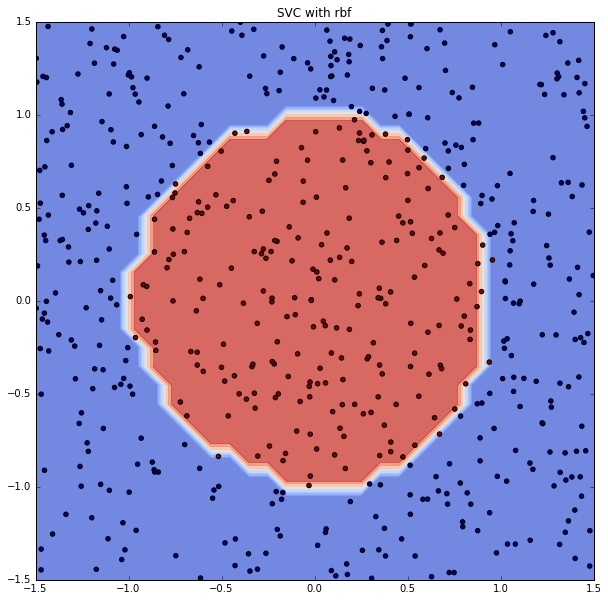

In [13]:
scaler = sk.preprocessing.StandardScaler().fit(x_train)
clf = sk.svm.SVC(kernel = 'rbf', C=1.0) # svm with rbf kernel (default)
clf.fit(scaler.transform(x_train), y_train);
xx, yy = np.meshgrid(np.linspace(-5, 5, 100),np.linspace(-5, 5,100))
Z = clf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
print(clf.score(x_test,y_test))
plt.figure(figsize=(10,10))
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.xlim(-box_side/2.,box_side/2.)
plt.ylim(-box_side/2.,box_side/2.)
plt.title('SVC with rbf')
plt.show()

0.61


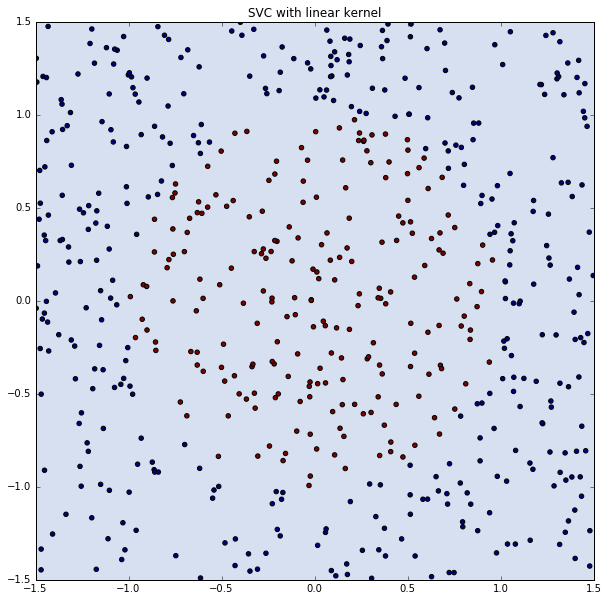

In [14]:
scaler = sk.preprocessing.StandardScaler().fit(x_train)
clf = sk.svm.SVC(kernel = 'linear', C=1.0) # svm with rbf kernel (default)
clf.fit(scaler.transform(x_train), y_train);
xx, yy = np.meshgrid(np.linspace(-5, 5, 100),np.linspace(-5, 5,100))
Z = clf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
print(clf.score(x_test,y_test))
plt.figure(figsize=(10,10))
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.xlim(-box_side/2.,box_side/2.)
plt.ylim(-box_side/2.,box_side/2.)
plt.title('SVC with linear kernel')
plt.show()

0.61


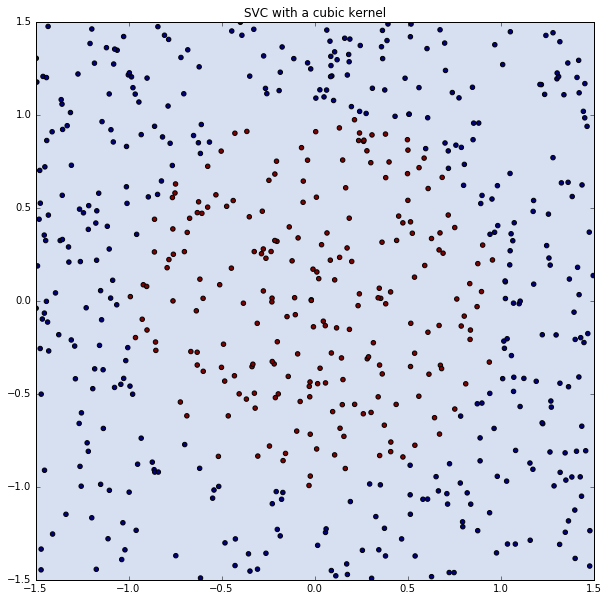

In [17]:
scaler = sk.preprocessing.StandardScaler().fit(x_train)
clf = sk.svm.SVC(kernel = 'poly', degree=3., C=1.0) # svm with rbf kernel (default)
clf.fit(scaler.transform(x_train), y_train);
xx, yy = np.meshgrid(np.linspace(-5, 5, 100),np.linspace(-5, 5,100))
Z = clf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
print(clf.score(x_test,y_test))
plt.figure(figsize=(10,10))
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.xlim(-box_side/2.,box_side/2.)
plt.ylim(-box_side/2.,box_side/2.)
plt.title('SVC with a cubic kernel')
plt.show()

0.875


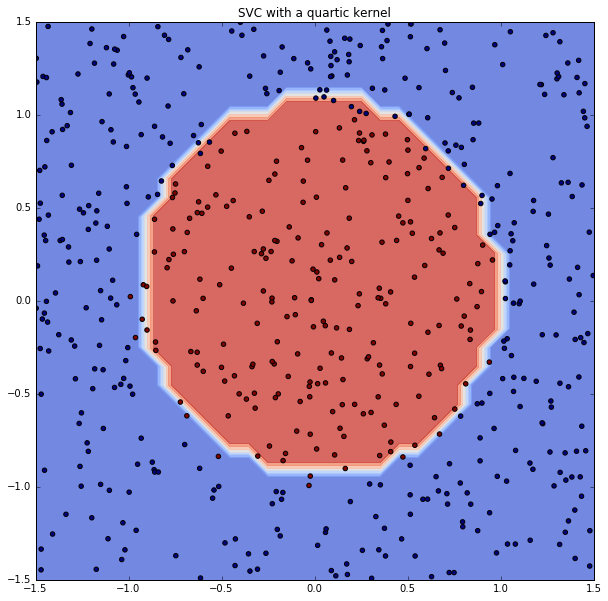

In [18]:
scaler = sk.preprocessing.StandardScaler().fit(x_train)
clf = sk.svm.SVC(kernel = 'poly', degree=4., C=1.0) # svm with rbf kernel (default)
clf.fit(scaler.transform(x_train), y_train);
xx, yy = np.meshgrid(np.linspace(-5, 5, 100),np.linspace(-5, 5,100))
Z = clf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
print(clf.score(x_test,y_test))
plt.figure(figsize=(10,10))
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.xlim(-box_side/2.,box_side/2.)
plt.ylim(-box_side/2.,box_side/2.)
plt.title('SVC with a quartic kernel')
plt.show()

## To separate two cores from its surroundings

In [46]:
from sklearn.pipeline import Pipeline

In [74]:
num_points = 5000
box_side = 12
radius = 2;
x = box_side/2.*(2.*(np.random.random((num_points,2))-0.5))
y = np.zeros(len(x))
for counter in range(len(y)):
    if (x[counter][0]-3.5)**2+x[counter][1]**2<=radius**2 or  (x[counter][0]+3.5)**2+x[counter][1]**2<=radius**2 :
        y[counter] = 1
    else:
        y[counter] = 0
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=10)

In [75]:
sum(y_train)

556.0

0.8025


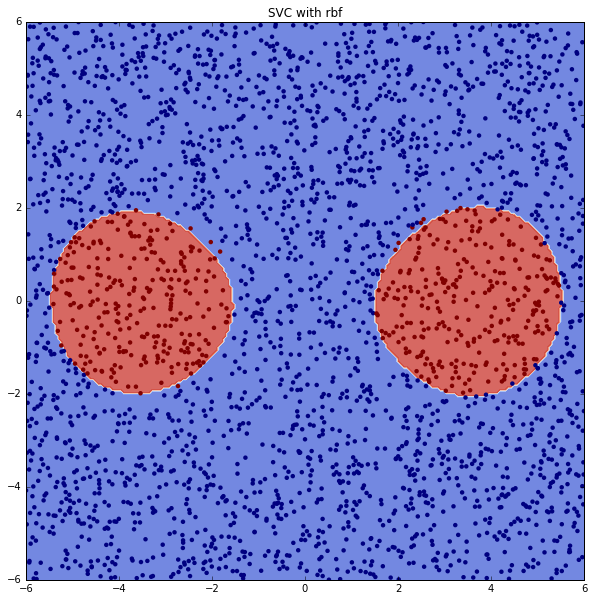

In [81]:
scaler = sk.preprocessing.StandardScaler()#.fit(x_train)
clf = sk.svm.SVC(kernel = 'rbf') # svm with rbf kernel (default)
pipe = Pipeline([('scaler',scaler),('svc', clf)])
pipe.set_params(svc__C=1.0).fit(x_train,y_train);
xx, yy = np.meshgrid(np.linspace(-box_side/2, box_side/2, 200),np.linspace(-box_side/2., box_side/2.,200))
Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(clf.score(x_test,y_test))
plt.figure(figsize=(10,10))
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,lw=0)
plt.xlim(-box_side/2.,box_side/2.)
plt.ylim(-box_side/2.,box_side/2.)
plt.title('SVC with rbf')
plt.show()

In [82]:
pipe.score(x_train[y_train==0],y_train[y_train==0])

0.99754500818330605

In [83]:
pipe.score(x_train[y_train==1],y_train[y_train==1])

0.96942446043165464

0.822


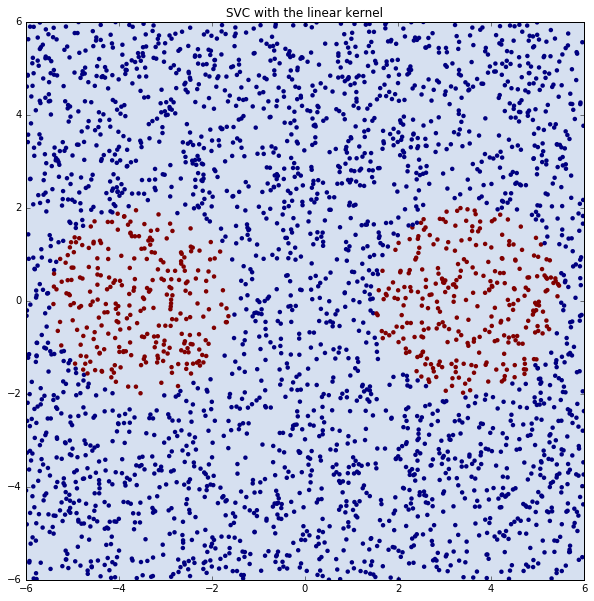

In [88]:
scaler = sk.preprocessing.StandardScaler()#.fit(x_train)
clf = sk.svm.SVC(kernel = 'linear') # svm with rbf kernel (default)
pipe = Pipeline([('scaler',scaler),('svc', clf)])
pipe.set_params(svc__C=1.0).fit(x_train,y_train);
xx, yy = np.meshgrid(np.linspace(-box_side/2, box_side/2, 200),np.linspace(-box_side/2., box_side/2.,200))
Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(clf.score(x_test,y_test))
plt.figure(figsize=(10,10))
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,lw=0)
plt.xlim(-box_side/2.,box_side/2.)
plt.ylim(-box_side/2.,box_side/2.)
plt.title('SVC with the linear kernel')
plt.show()

In [85]:
pipe.score(x_train[y_train==0],y_train[y_train==0])

1.0

In [86]:
pipe.score(x_train[y_train==1],y_train[y_train==1])

0.0

## To separate four cores from its surroundings

In [89]:
from sklearn.pipeline import Pipeline

In [99]:
num_points = 5000
box_side = 12
radius = 1.5;
x = box_side/2.*(2.*(np.random.random((num_points,2))-0.5))
y = np.zeros(len(x))
for counter in range(len(y)):
    if (x[counter][0]-3.5)**2+x[counter][1]**2<=radius**2 or  (x[counter][0]+3.5)**2+x[counter][1]**2<=radius**2 or   (x[counter][1]+3.5)**2+x[counter][0]**2<=radius**2 or  (x[counter][1]-3.5)**2+x[counter][0]**2<=radius**2:
        y[counter] = 1
    else:
        y[counter] = 0
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=10)

In [100]:
sum(y_train)

595.0

0.775


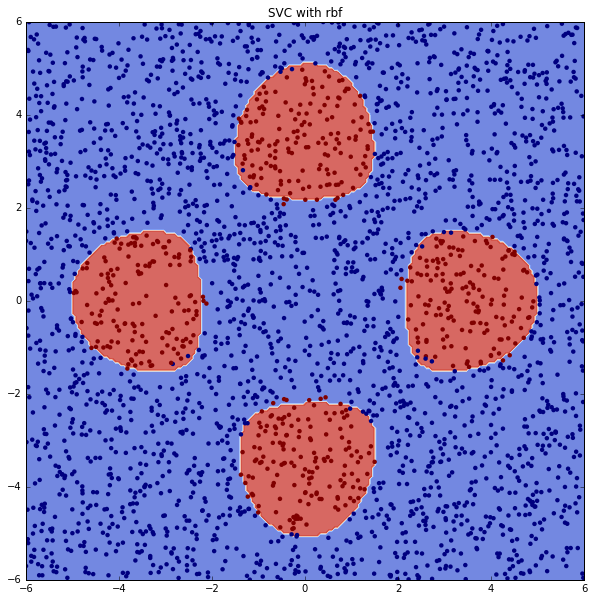

In [127]:
scaler = sk.preprocessing.StandardScaler()#.fit(x_train)
clf = sk.svm.SVC(kernel = 'rbf') # svm with rbf kernel (default)
pipe = Pipeline([('scaler',scaler),('svc', clf)])
pipe.set_params(svc__C=200.0).fit(x_train,y_train);
xx, yy = np.meshgrid(np.linspace(-box_side/2, box_side/2, 200),np.linspace(-box_side/2., box_side/2.,200))
Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(clf.score(x_test,y_test))
plt.figure(figsize=(10,10))
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,lw=0)
plt.xlim(-box_side/2.,box_side/2.)
plt.ylim(-box_side/2.,box_side/2.)
plt.title('SVC with rbf')
plt.show()

In [128]:
len(pipe.get_params()['svc'].support_vectors_)

315

In [129]:
pipe.score(x_train[y_train==0],y_train[y_train==0])

0.99251559251559252

In [130]:
pipe.score(x_train[y_train==1],y_train[y_train==1])

0.94957983193277307

## To separate six random cores from its surroundings

In [89]:
from sklearn.pipeline import Pipeline

In [185]:
def rando(minv,maxv):
    return minv+np.random.random()*(maxv-minv)
def dist_sq(a,b):
    return (a[0]-b[0])**2+(a[1]-b[1])**2
def circle(center, radius):
    return np.array([center + radius * np.array([np.cos(theta), np.sin(theta)]) for theta in np.linspace(0,2*np.pi,50)])

In [188]:
num_points = 5000
box_side = 12
radius = 1.;
x = box_side/2.*(2.*(np.random.random((num_points,2))-0.5))
y = np.zeros(len(x))
centers = [ [rando(-box_side/2,box_side/2),rando(-box_side/2,box_side/2)] for i in range(6)]
for counter in range(len(x)):
    one_x = x[counter]
    for center in centers:
        if dist_sq(center,one_x) <= radius**2:
            y[counter] = 1
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=10)

0.8465


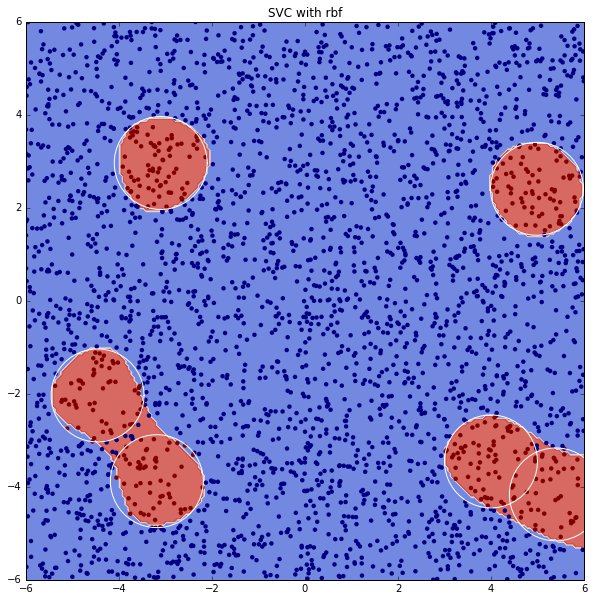

In [193]:
scaler = sk.preprocessing.StandardScaler()#.fit(x_train)
clf = sk.svm.SVC(kernel = 'rbf') # svm with rbf kernel (default)
pipe = Pipeline([('scaler',scaler),('svc', clf)])
pipe.set_params(svc__C=10000.0).fit(x_train,y_train);
xx, yy = np.meshgrid(np.linspace(-box_side/2, box_side/2, 200),np.linspace(-box_side/2., box_side/2.,200))
Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(clf.score(x_test,y_test))
plt.figure(figsize=(10,10))
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,lw=0)
plt.xlim(-box_side/2.,box_side/2.)
plt.ylim(-box_side/2.,box_side/2.)
plt.title('SVC with rbf')
for this_center in centers:
    circumference = circle(this_center,radius)
    plt.plot(circumference[:,0],circumference[:,1],'ow-',ms=0)
plt.show()

In [194]:
pipe.score(x_test[y_test==0],y_test[y_test==0])

0.99247249565720908

In [195]:
pipe.score(x_test[y_test==1],y_test[y_test==1])

0.91208791208791207

0.8635


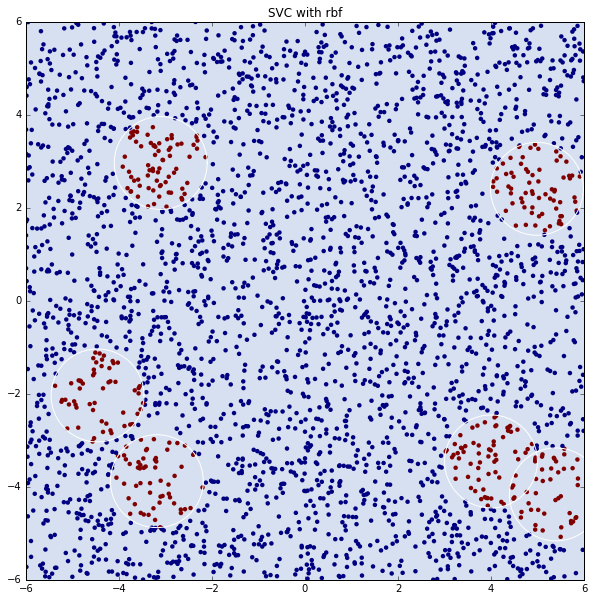

In [196]:
scaler = sk.preprocessing.StandardScaler()#.fit(x_train)
clf = sk.svm.SVC(kernel = 'linear') # svm with rbf kernel (default)
pipe = Pipeline([('scaler',scaler),('svc', clf)])
pipe.set_params(svc__C=10000.0).fit(x_train,y_train);
xx, yy = np.meshgrid(np.linspace(-box_side/2, box_side/2, 200),np.linspace(-box_side/2., box_side/2.,200))
Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(clf.score(x_test,y_test))
plt.figure(figsize=(10,10))
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,lw=0)
plt.xlim(-box_side/2.,box_side/2.)
plt.ylim(-box_side/2.,box_side/2.)
plt.title('SVC with rbf')
for this_center in centers:
    circumference = circle(this_center,radius)
    plt.plot(circumference[:,0],circumference[:,1],'ow-',ms=0)
plt.show()

In [199]:
pipe.score(x_test[y_test==0],y_test[y_test==0])

1.0

In [200]:
pipe.score(x_test[y_test==1],y_test[y_test==1])

0.0

## Identify points on the lattice

In [89]:
from sklearn.pipeline import Pipeline

In [185]:
def rando(minv,maxv):
    return minv+np.random.random()*(maxv-minv)
def dist_sq(a,b):
    return (a[0]-b[0])**2+(a[1]-b[1])**2
def circle(center, radius):
    return np.array([center + radius * np.array([np.cos(theta), np.sin(theta)]) for theta in np.linspace(0,2*np.pi,50)])

In [188]:
num_points = 5000
box_side = 12
radius = 1.;
x = box_side/2.*(2.*(np.random.random((num_points,2))-0.5))
y = np.zeros(len(x))
centers = [ [rando(-box_side/2,box_side/2),rando(-box_side/2,box_side/2)] for i in range(6)]
for counter in range(len(x)):
    one_x = x[counter]
    for center in centers:
        if dist_sq(center,one_x) <= radius**2:
            y[counter] = 1
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=10)

0.8465


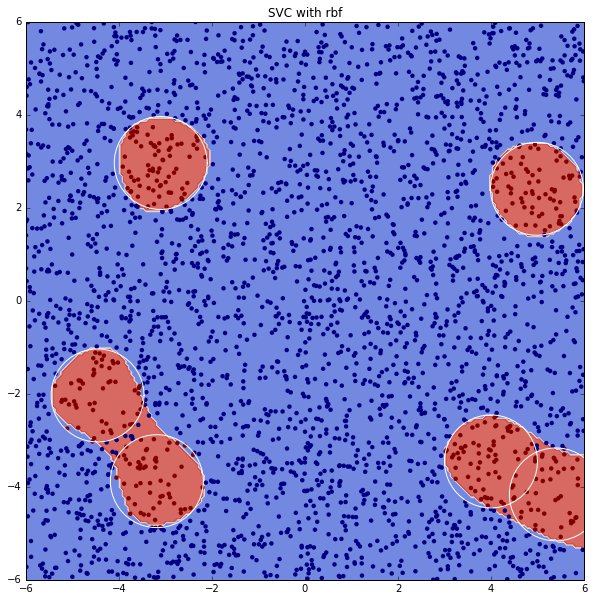

In [193]:
scaler = sk.preprocessing.StandardScaler()#.fit(x_train)
clf = sk.svm.SVC(kernel = 'rbf') # svm with rbf kernel (default)
pipe = Pipeline([('scaler',scaler),('svc', clf)])
pipe.set_params(svc__C=10000.0).fit(x_train,y_train);
xx, yy = np.meshgrid(np.linspace(-box_side/2, box_side/2, 200),np.linspace(-box_side/2., box_side/2.,200))
Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(clf.score(x_test,y_test))
plt.figure(figsize=(10,10))
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,lw=0)
plt.xlim(-box_side/2.,box_side/2.)
plt.ylim(-box_side/2.,box_side/2.)
plt.title('SVC with rbf')
for this_center in centers:
    circumference = circle(this_center,radius)
    plt.plot(circumference[:,0],circumference[:,1],'ow-',ms=0)
plt.show()

In [194]:
pipe.score(x_test[y_test==0],y_test[y_test==0])

0.99247249565720908

In [195]:
pipe.score(x_test[y_test==1],y_test[y_test==1])

0.91208791208791207

In [ ]:
scaler = sk.preprocessing.StandardScaler()#.fit(x_train)
clf = sk.svm.SVC(kernel = 'linear') # svm with rbf kernel (default)
pipe = Pipeline([('scaler',scaler),('svc', clf)])
pipe.set_params(svc__C=10000.0).fit(x_train,y_train);
xx, yy = np.meshgrid(np.linspace(-box_side/2, box_side/2, 200),np.linspace(-box_side/2., box_side/2.,200))
Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(clf.score(x_test,y_test))
plt.figure(figsize=(10,10))
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,lw=0)
plt.xlim(-box_side/2.,box_side/2.)
plt.ylim(-box_side/2.,box_side/2.)
plt.title('SVC with rbf')
for this_center in centers:
    circumference = circle(this_center,radius)
    plt.plot(circumference[:,0],circumference[:,1],'ow-',ms=0)
plt.show()

In [110]:
pipe.score(x_test[y_test==0],y_test[y_test==0])

1.0

In [111]:
pipe.score(x_test[y_test==1],y_test[y_test==1])

0.0